In [2]:
import pandas as pd
import numpy as np

from pandas import DataFrame
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree, preprocessing


# 1. feladat

Az https://github.com/kiscsonti/student_data/raw/main/mushroom_dataset.zip fájl egy adatbázit tartalmaz gombákról. Töltsd le és írj egy egyszerű döntési szabályt (egy jellemzőből), ami jobban dönti el, hogy ehető-e a gomba (`class=e`) mint a leggyakoribb osztály baseline. Kiértékelési metrikaként a mérgező osztály (`class=p`) F1 Score-ját használd!

## A jellemzőkről leírás:

* class: edible=e, poisonous=p
* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
* gill-attachment: attached=a,descending=d,free=f,notched=n
* stalk-shape: enlarging=e,tapering=t
* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
* veil-type: partial=p,universal=u
* veil-color: brown=n,orange=o,white=w,yellow=y
* ring-number: none=n,one=o,two=t

In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/kiscsonti/student_data/main/mushroom.csv")
dataset.head()

,class,cap-surface,gill-attachment,stalk-shape,stalk-root,veil-type,veil-color,ring-number
0,p,s,f,e,e,p,w,o
1,e,s,f,e,c,p,w,o
2,e,s,f,e,c,p,w,o
3,p,y,f,e,e,p,w,o
4,e,s,f,t,e,p,w,o


In [4]:
# egy diszkrét jellemző alapján
pd.crosstab(dataset["class"], dataset["cap-surface"])

cap-surface,f,g,s,y
class,,,,
e,1560,0,1144,1504
p,760,4,1412,1740


In [5]:
classlabel = dataset["class"]
features = dataset.iloc[:,1:]

dummy_clf = DummyClassifier(strategy="most_frequent") # tanító adatbázis leggyakoribb osztálya lesz mindig a predikció
dummy_clf.fit(features, classlabel) # ugyanazon a tanító adatbázison "tanítjuk"
baseline_prediction = dummy_clf.predict(features) # predikció a kiértékelő adatbázison
print(f1_score(classlabel,baseline_prediction,pos_label='p'))
#print(accuracy_score(baseline_prediction,classlabel))
print(classification_report(classlabel, baseline_prediction))

pred = pd.Series(['e'] * len(dataset)) # egy konstans 'p'-kat tartalamazó Series
pred[dataset["cap-surface"] == 'y'] = 'p'

print(f1_score(classlabel,pred,pos_label='p'))
#print(accuracy_score(pred,classlabel))
print(classification_report(classlabel, pred))

0.0
              precision    recall  f1-score   support

           e       0.52      1.00      0.68      4208
           p       0.00      0.00      0.00      3916

    accuracy                           0.52      8124
   macro avg       0.26      0.50      0.34      8124
weighted avg       0.27      0.52      0.35      8124

0.4860335195530726


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           e       0.55      0.64      0.60      4208
           p       0.54      0.44      0.49      3916

    accuracy                           0.55      8124
   macro avg       0.55      0.54      0.54      8124
weighted avg       0.55      0.55      0.54      8124



# 2. feladat

Hajts végre gépi tanulási kísérletet arra nézve, hogy egy gomba mérgező/ehető mennyire jól állapítható meg a jellemzők alapján! Használd az adat véletlenszerű 20%-át kiértékelő adatbázisnak.

In [11]:
from sklearn import preprocessing
# ha csak a diszkrét változókat one hot encodoljuk:
ohe = preprocessing.OneHotEncoder() #one hot encoding
ohe_features = ohe.fit_transform(features)

ohe_features = pd.DataFrame.sparse.from_spmatrix(ohe_features, columns=ohe.get_feature_names_out(features.columns), index=features.index)

from sklearn.model_selection import train_test_split
features_train, features_test, classlabel_train, classlabel_test = train_test_split(ohe_features, classlabel, test_size=0.2, random_state=42)

from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(features_train,classlabel_train)
results = dt.predict(features_test)
f1_score(classlabel_test,results ,pos_label='p')

from sklearn.metrics import classification_report
print(classification_report(classlabel_test, results))
f1_score(classlabel_test,results,pos_label='p')

              precision    recall  f1-score   support

           e       0.99      0.96      0.98       843
           p       0.96      0.99      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.98      0.97      1625
weighted avg       0.98      0.97      0.97      1625



0.974294670846395

# 3. feladat
Próbálj ki egy másik gépi tanuló algoritmust is a 2. feladatra. Mindkettőnek hangold be a meta-paraméterit. (bónus feladat: a meta-paraméter értékekre a túltanási ábra kirajzolása)

A végén szövegként írd le, hogy a két algoritmus közül melyik a jobb!


In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier() # n_neighbors a k érték (szomszédok száma)

from sklearn.metrics import accuracy_score
model.fit(features_train,classlabel_train)
prediction = model.predict(features_test)
f1_score(classlabel_test,prediction ,pos_label='p')



0.9735182849936949

DT-hangolás

In [13]:
### különböző fa mélységi értékekkel tanítjuk a fát
dt_valid_f1=[]
dt_train_f1=[]
for d in range(1,40):
  dt = tree.DecisionTreeClassifier(max_depth=d) # döntési fa mélysége
  dt.fit(features_train,classlabel_train)  # tanítunk a tanító adatbázison
  valid_prediction = dt.predict(features_test)
  dt_valid_f1.append(f1_score(classlabel_test, valid_prediction, pos_label="p")) # kiértékelés a validációs halmazon
  train_prediction = dt.predict(features_train)
  dt_train_f1.append(f1_score(classlabel_train, train_prediction, pos_label="p")) # a tanító adatbázison is kiértékeljük a túltanulási vizsgálatokhoz

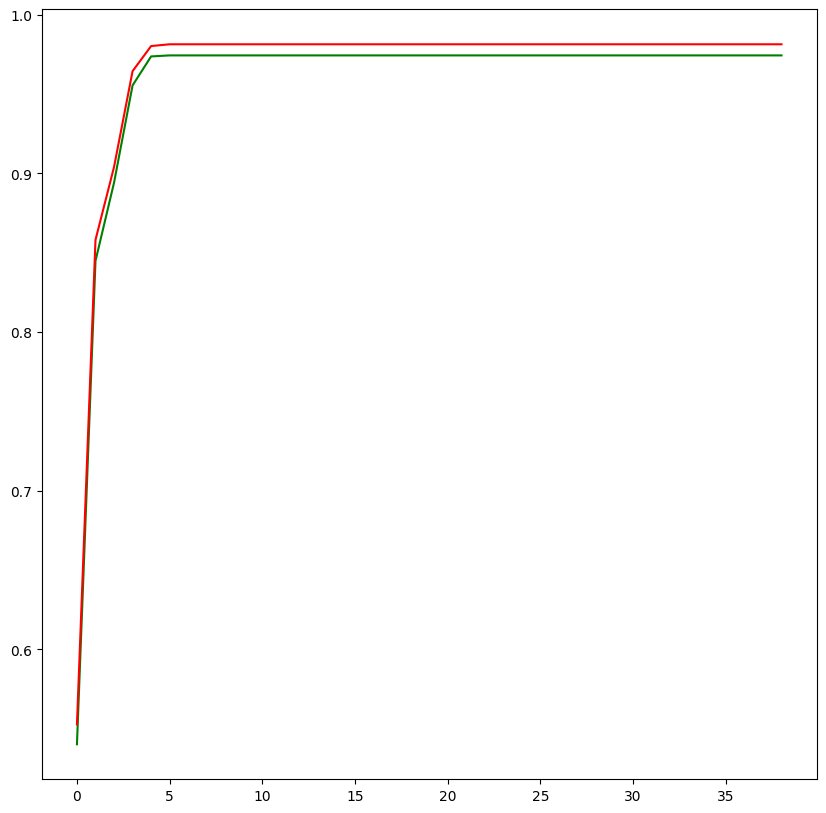

In [14]:
### jelenítsük meg az eredményeket
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(dt_valid_f1, c="green")
plt.plot(dt_train_f1, c="red")

KNN-hangolás

In [16]:
### különböző fa mélységi értékekkel tanítjuk a fát
knn_valid_f1=[]
knn_train_f1=[]
for k in range(1,20,2): # páratlan k értékek
  knn = KNeighborsClassifier(n_neighbors=k) # kNN különböző k értékekkel
  knn.fit(features_train, classlabel_train)
  valid_prediction = knn.predict(features_test)
  knn_valid_f1.append(f1_score(classlabel_test, valid_prediction, pos_label="p"))
  train_prediction = knn.predict(features_train)
  knn_train_f1.append(f1_score(classlabel_train, train_prediction, pos_label="p"))

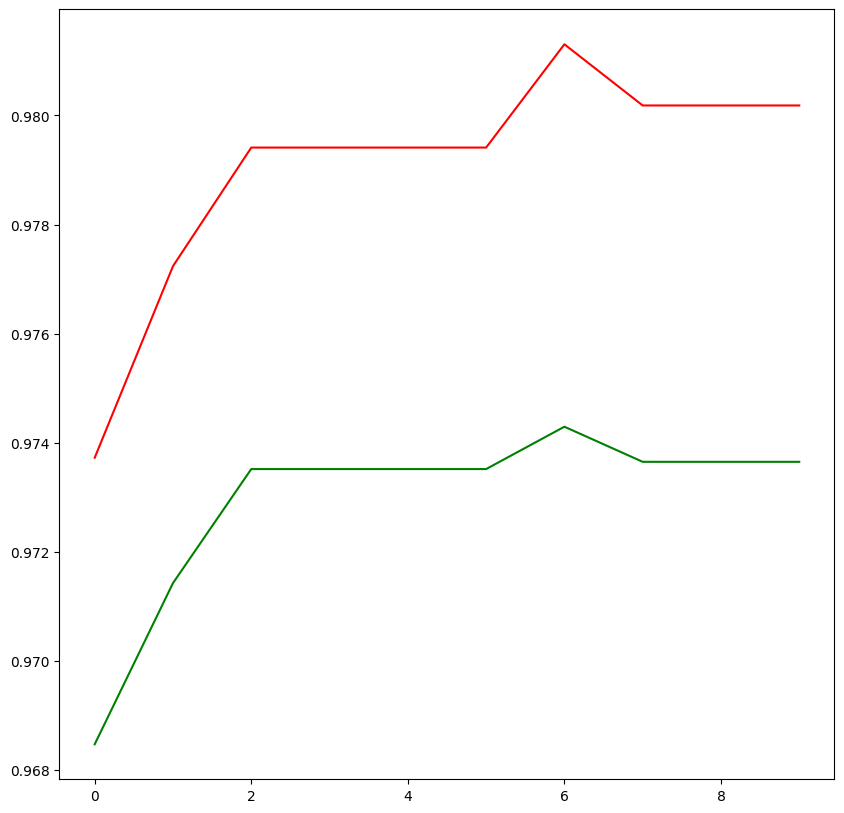

In [17]:
plt.figure(figsize=(10,10))
plt.plot(knn_valid_f1, c="green")
plt.plot(knn_train_f1, c="red")

In [18]:
# KNN legjobb predikció
model = KNeighborsClassifier(n_neighbors=4) # n_neighbors a k érték (szomszédok száma)
model.fit(features_train,classlabel_train)
prediction = model.predict(features_test)
knnf1 = f1_score(classlabel_test,prediction ,pos_label='p')

# DT legjobb predikció
dt = tree.DecisionTreeClassifier(max_depth=4) # döntési fa mélysége
dt.fit(features_train,classlabel_train)  # tanítunk a tanító adatbázison
valid_prediction = dt.predict(features_test)
dtf1 = f1_score(classlabel_test,valid_prediction,pos_label='p')

if dtf1>knnf1:
  print("DT jobban predikált")
else:
  print("KNN jobban predikált")

KNN jobban predikált


A KNN jobban predikált azonos feltételek mellett.